In [6]:
import matplotlib.pyplot as plt
# import matplotlib
import numpy as np
# import tkinter
# matplotlib.use('TkAgg')
%matplotlib inline

#plumed sum_hills --hills HILLS

In [7]:
def openFileBroad(fileName):
    data = np.fromfile(fileName, sep= " ", dtype=float)
    wavelNumber, *intensity = data.reshape(-1,5).T  # wavenumber in cm-1
    waveLengh = wavelNumber
    waveLengh = (1/wavelNumber) * 1e7
    return waveLengh , intensity

def openFileSharp(fileName):
    newArr = np.array([])
    data = np.fromfile(fileName, sep= " ", dtype=float).reshape(-1,2)
    for line in data:
        newArr = np.append(newArr, np.array([line[0]-11,0]), axis=-1)
        newArr = np.append(newArr, line, axis=-1)
        

    wavelNumber, *intensity = newArr.reshape(-1,2).T  # wavenumber in cm-1
    waveLengh = wavelNumber
    waveLengh = (1/wavelNumber) * 1e7
    return waveLengh , intensity

wave, intensity = openFileSharp("spectraSharp")

FileNotFoundError: [Errno 2] No such file or directory: 'spectraSharp'

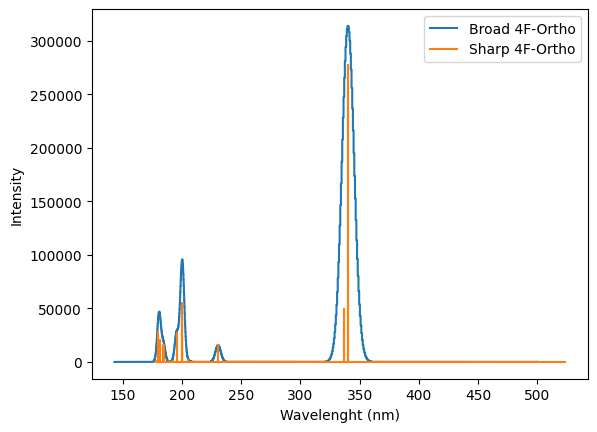

In [13]:
fileNames= {
    "4FOrtho-spectraBroad": "Broad 4F-Ortho",
    "4FOrtho-spectraSharp": "Sharp 4F-Ortho"
}

def genData(fileNames:dict[str,str]):
    for fileName in fileNames.keys():
        if "Broad" in fileNames[fileName]:
            data = openFileBroad(fileName)
        else:
            data = openFileSharp(fileName)
        label = fileNames[fileName]
        yield data, label


fig, ax = plt.subplots()
ax.set_ylabel("Intensity")
ax.set_xlabel(r"Wavelenght (nm)")
#ax.set_ylim(0, 150000)
#ax.set_xlim(left = 150, right= "...")
for data, label in genData(fileNames):
    for inten in data[1][0:1]:
        ax.step(data[0], inten, label = label)
ax.legend();
fig.savefig("4F-Ortho.png")

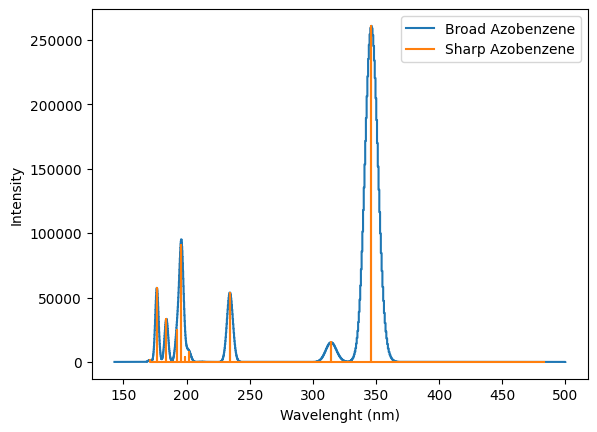

In [12]:
fileNames= {
    "Azobenz-spectraBroad": "Broad Azobenzene",
    "Azobenz-spectraSharp": "Sharp Azobenzene"
}

def genData(fileNames:dict[str,str]):
    for fileName in fileNames.keys():
        if "Broad" in fileNames[fileName]:
            data = openFileBroad(fileName)
        else:
            data = openFileSharp(fileName)
        label = fileNames[fileName]
        yield data, label


fig, ax = plt.subplots()
ax.set_ylabel("Intensity")
ax.set_xlabel(r"Wavelenght (nm)")
#ax.set_ylim(0, 150000)
#ax.set_xlim(left = 150, right= "...")
for data, label in genData(fileNames):
    for inten in data[1][0:1]:
        ax.step(data[0], inten, label = label)
ax.legend();
fig.savefig("Azobenzene.png")

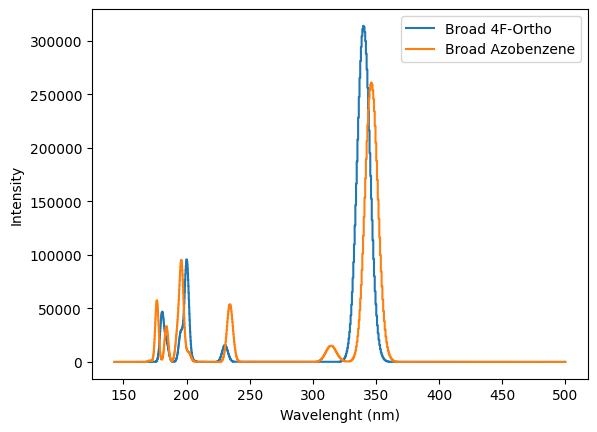

In [11]:
fileNames= {
    "4FOrtho-spectraBroad": "Broad 4F-Ortho",
    "Azobenz-spectraBroad": "Broad Azobenzene"
}

def genData(fileNames:dict[str,str]):
    for fileName in fileNames.keys():
        if "Broad" in fileNames[fileName]:
            data = openFileBroad(fileName)
        else:
            data = openFileSharp(fileName)
        label = fileNames[fileName]
        yield data, label


fig, ax = plt.subplots()
ax.set_ylabel("Intensity")
ax.set_xlabel(r"Wavelenght (nm)")
#ax.set_ylim(0, 150000)
#ax.set_xlim(left = 150, right= "...")
for data, label in genData(fileNames):
    for inten in data[1][0:1]:
        ax.step(data[0], inten, label = label)
ax.legend();
fig.savefig("together.png")